In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

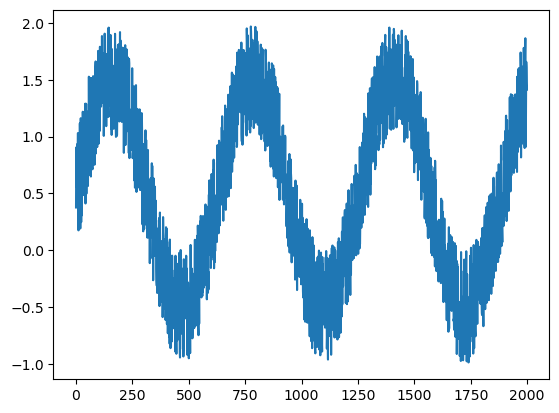

In [140]:
t = np.arange(0,2000)
x = np.sin(0.01*t)+np.random.rand(2000) 
plt.plot(x)
plt.show()

## Train-Test split 

In [141]:
train,test = x[0:1500], x[1500:]

# STEP

In [142]:
step = 20


def convertToDataset(data, step):
    X = []
    Y = []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX,trainY = convertToDataset(train,step)
testX,testY = convertToDataset(test,step)

In [143]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1480, 20)
(1480,)
(480, 20)
(480,)


    (NumberOfSequences, TimeSteps, ElementsPerStep)

In [144]:
trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [145]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1480, 20, 1)
(1480,)
(480, 20, 1)
(480,)


# build a simple RNN

In [146]:
model = Sequential()
model.add(SimpleRNN(units=64, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
              optimizer='rmsprop')

In [147]:
# model.summary()

# Fitting

In [149]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
93/93 - 1s - loss: 0.0697 - 616ms/epoch - 7ms/step
Epoch 2/100
93/93 - 1s - loss: 0.0677 - 595ms/epoch - 6ms/step
Epoch 3/100
93/93 - 1s - loss: 0.0678 - 596ms/epoch - 6ms/step
Epoch 4/100
93/93 - 1s - loss: 0.0667 - 617ms/epoch - 7ms/step
Epoch 5/100
93/93 - 1s - loss: 0.0660 - 602ms/epoch - 6ms/step
Epoch 6/100
93/93 - 1s - loss: 0.0656 - 587ms/epoch - 6ms/step
Epoch 7/100
93/93 - 1s - loss: 0.0645 - 594ms/epoch - 6ms/step
Epoch 8/100
93/93 - 1s - loss: 0.0638 - 580ms/epoch - 6ms/step
Epoch 9/100
93/93 - 1s - loss: 0.0632 - 600ms/epoch - 6ms/step
Epoch 10/100
93/93 - 1s - loss: 0.0626 - 614ms/epoch - 7ms/step
Epoch 11/100
93/93 - 1s - loss: 0.0622 - 585ms/epoch - 6ms/step
Epoch 12/100
93/93 - 1s - loss: 0.0609 - 563ms/epoch - 6ms/step
Epoch 13/100
93/93 - 1s - loss: 0.0593 - 566ms/epoch - 6ms/step
Epoch 14/100
93/93 - 1s - loss: 0.0591 - 584ms/epoch - 6ms/step
Epoch 15/100
93/93 - 1s - loss: 0.0589 - 614ms/epoch - 7ms/step
Epoch 16/100
93/93 - 1s - loss: 0.0575 - 597ms/ep

In [150]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 64)                4224      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [151]:
model.input

<KerasTensor: shape=(None, 20, 1) dtype=float32 (created by layer 'simple_rnn_12_input')>

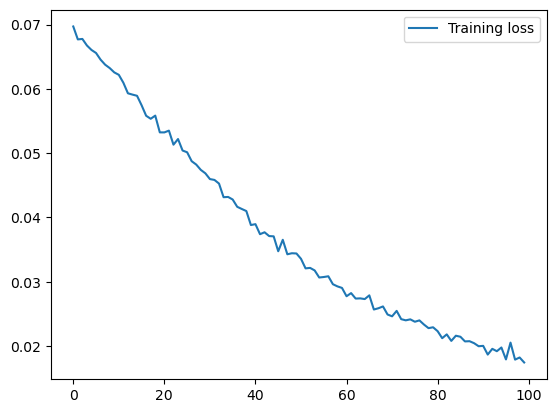

In [152]:
loss = history.history['loss']
plt.plot(loss, label='Training loss')
plt.legend()
plt.show()

# Predictions

In [154]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

15/15 [==============================] - 0s 3ms/step


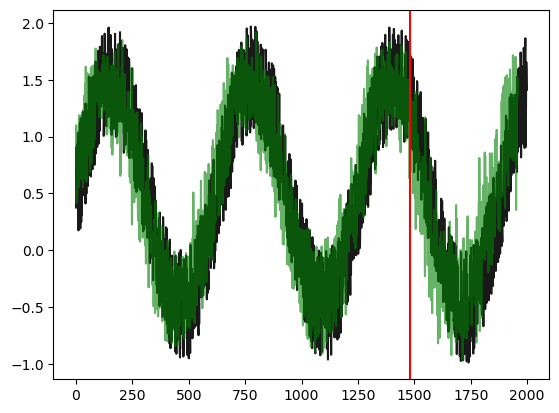

In [155]:
plt.plot(x, c='k', alpha=0.9)
plt.plot(predicted, c='g', alpha=0.6)
plt.axvline(len(trainX), c="r")
plt.show()